### Generating a lot of captcha image files for training

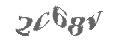

In [4]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import string
import random
import math

# returning a captcha image in np.array
def generate_captcha(symbols, captcha_len):
    img = np.full(shape=(100, 200, 3), fill_value=255, dtype=np.uint8)
    img_pil = Image.fromarray(img)
    text_size = random.randint(26,28)
    text_position = (random.randint(10, 20), random.randint(5, 10))
    font=random.choice(['DejaVuSerif-Bold'])

    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.truetype(font=font, size=text_size)
    answer = ''.join(random.sample(symbols, captcha_len))
    draw.text(text_position, answer, font=font, fill=(100,100,100))

    return np.array(img_pil, dtype=np.uint8), answer

# adding warp effect to an image
def warp_image(input):
    rows, cols = input.shape[:2]
    freq_x = random.randint(4, 7) * random.choice([1, -1])
    freq_y = random.randint(5, 10) * random.choice([1, -1])
    depth_x = random.randint(4, 5) * random.choice([1, -1])
    depth_y = random.randint(5, 8) * random.choice([1, -1])
    output = np.zeros(input.shape, dtype=input.dtype)
    for i in range(rows):
        for j in range(cols):
            offset_x = int(depth_x * math.sin(freq_x * 3.14 * i / 180))
            offset_y = int(depth_y * math.cos(freq_y * 3.14 * j / 180))
            if i + offset_y < rows and j + offset_x < cols:
                output[i, j] = input[(i + offset_y) % rows, (j + offset_x) % cols]
            else:
                output[i, j] = 255
    return output

symbols = string.ascii_lowercase + string.digits
captcha_len = 5

output, answer = generate_captcha(symbols=symbols, captcha_len=captcha_len)
output = warp_image(output)
output_img = Image.fromarray(output[0:50, 0:120])
output_img

In [5]:
from joblib import Parallel, delayed
import multiprocessing

num_cores=multiprocessing.cpu_count()
num_cores

16

In [8]:
from tqdm import tqdm
import os

n_sample = 500000
path = './data/img/'
if not os.path.exists(path):
    os.mkdir(path)

itr = n_sample - len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
print(itr)

def gen_images():
    output, answer = generate_captcha(symbols=symbols, captcha_len=captcha_len)
    output = warp_image(output)
    output_img = Image.fromarray(output[0:50, 0:120])
    output_img.save(path + answer + '.jpg')
     
Parallel(n_jobs=num_cores)(delayed(gen_images)() for i in tqdm(range(itr)))

0


0it [00:00, ?it/s]


[]